<a href="https://colab.research.google.com/github/Shubham12-DS/Simple-EDA/blob/main/IPL%20Exploratory%20Data%20Analysis%20(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


match_df=pd.read_csv("match_dataset.csv")
deli_df=pd.read_csv("deliveries_dataset.csv")

In [5]:
match_df['date']=pd.to_datetime(match_df['date'])
match_df['season']=match_df['date'].dt.year

In [7]:
# 1. What was the count of matches played in each season?
matches_per_season = match_df['season'].value_counts().sort_index()
print("1. Matches per Season:\n", matches_per_season)

1. Matches per Season:
 season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
2020    60
Name: count, dtype: int64


In [8]:
#2. How many runs were scored in each season?
runs_per_season = deli_df.merge(match_df[['id', 'season']],on='id')
total_runs_per_season = runs_per_season.groupby('season')['total_runs'].sum()
total_runs_per_season


,total_runs
season,
2008,17937
2009,16320
2010,18864
2011,21154
2012,22453
2013,22541
2014,18909
2015,18332
2016,18862


In [9]:
# 3. What were the runs scored per match in different seasons?
runs_per_match=runs_per_season.groupby(['season','id'])['total_runs'].sum().reset_index()
runs_per_match

,season,id,total_runs
0,2008,335982,304
1,2008,335983,447
2,2008,335984,261
3,2008,335985,331
4,2008,335986,222
...,...,...,...
811,2020,1216547,402
812,2020,1237177,343
813,2020,1237178,263
814,2020,1237180,361


In [10]:
# 4. Who has umpired the most?
umpire=pd.concat([match_df['umpire1'],match_df['umpire2']])
most_umpired=umpire.value_counts()
most_umpired

,count
S Ravi,121
HDPK Dharmasena,94
AK Chaudhary,87
C Shamshuddin,82
M Erasmus,65
CK Nandan,57
Nitin Menon,57
SJA Taufel,55
Asad Rauf,51
VA Kulkarni,50


In [11]:
# 5. Which team has won the most tosses?
most_toss_winner=match_df['toss_winner'].value_counts()
most_toss_winner

,count
toss_winner,
Mumbai Indians,106
Kolkata Knight Riders,98
Chennai Super Kings,97
Rajasthan Royals,87
Royal Challengers Bangalore,87
Kings XI Punjab,85
Delhi Daredevils,80
Sunrisers Hyderabad,57
Deccan Chargers,43


In [12]:
# 6. What does the team decide after winning the toss?
team_decide_after_winning=match_df['toss_decision'].value_counts()
team_decide_after_winning

,count
toss_decision,
field,496
bat,320


In [13]:
# 7. How does the toss decision vary across seasons?
toss_decision_across_seasons=match_df.groupby(['season','toss_decision']).size().unstack(fill_value=0)
toss_decision_across_seasons

#OR
T_D_A_S=match_df.groupby('season')['toss_decision'].value_counts()
T_D_A_S

season  toss_decision
2008    field            32
        bat              26
2009    bat              35
        field            22
2010    bat              39
        field            21
2011    field            48
        bat              25
2012    bat              37
        field            37
2013    bat              45
        field            31
2014    field            41
        bat              19
2015    field            34
        bat              25
2016    field            49
        bat              11
2017    field            48
        bat              11
2018    field            50
        bat              10
2019    field            50
        bat              10
2020    field            33
        bat              27
Name: count, dtype: int64

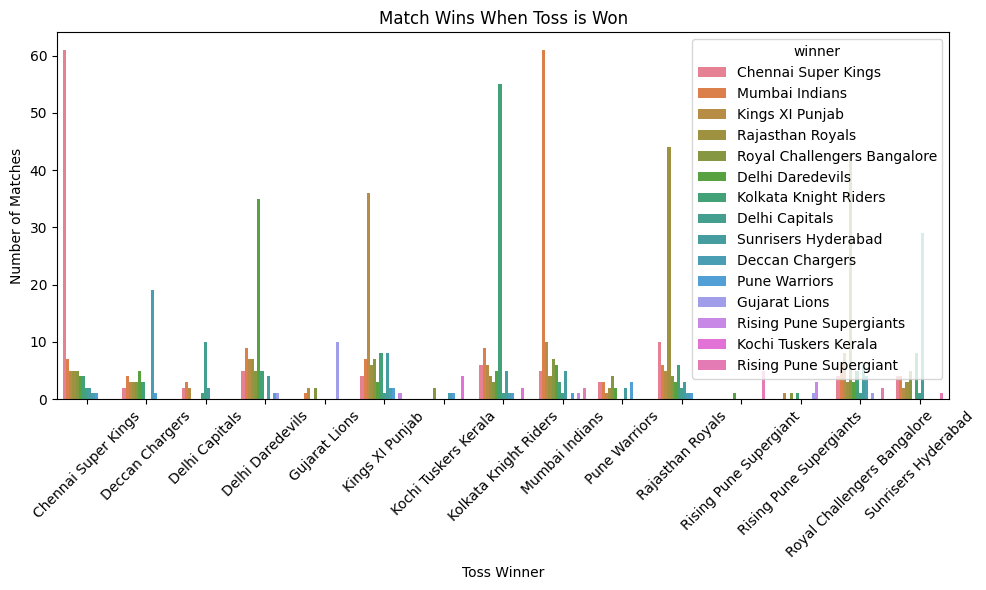

In [14]:
# 8. Does winning the toss imply winning the game?
toss_win_match_win_ratio=match_df.groupby('toss_winner')['winner'].value_counts().reset_index(name='count')
#toss_win_match_win_ratio

plt.figure(figsize=(10, 6))
sns.barplot(data=toss_win_match_win_ratio, x='toss_winner', y='count', hue='winner')
plt.xticks(rotation=45)
plt.title('Match Wins When Toss is Won')
plt.ylabel('Number of Matches')
plt.xlabel('Toss Winner')
plt.tight_layout()
plt.show()


In [15]:
# 9. How many times has the chasing team won the match?
chasing_wins = match_df[(match_df['toss_decision'] == 'field') & (match_df['toss_winner'] == match_df['winner'])]
chasing_wins.shape[0]

# For a DataFrame, .shape provides a tuple in the format (rows, columns).
# The first element of the tuple indicates the number of rows, and the second element indicates the number of columns.

273

In [16]:
# 10. Which all teams had won this tournament?
final_match=match_df.sort_values('date').drop_duplicates('season',keep="last")
tournament_winner=final_match['winner'].value_counts()
tournament_winner

,count
winner,
Mumbai Indians,5
Chennai Super Kings,3
Kolkata Knight Riders,2
Rajasthan Royals,1
Deccan Chargers,1
Sunrisers Hyderabad,1


In [17]:
# 11. Which team has played the most number of matches?

team1=match_df['team1'].value_counts()
team2=match_df['team2'].value_counts()

most_played_match=(team1+team2).sort_values(ascending=False)
most_played_match

,count
Mumbai Indians,203
Royal Challengers Bangalore,195
Kolkata Knight Riders,192
Kings XI Punjab,190
Chennai Super Kings,178
Rajasthan Royals,161
Delhi Daredevils,161
Sunrisers Hyderabad,124
Deccan Chargers,75
Pune Warriors,46


In [18]:
# 12. Which team has won the most number of times?
team_won_most_time=match_df['winner'].value_counts()
team_won_most_time

,count
winner,
Mumbai Indians,120
Chennai Super Kings,106
Kolkata Knight Riders,99
Royal Challengers Bangalore,91
Kings XI Punjab,88
Rajasthan Royals,81
Delhi Daredevils,67
Sunrisers Hyderabad,66
Deccan Chargers,29


In [19]:
# 13. Which team has the highest winning percentage?
win_percentage=(team_won_most_time/most_played_match * 100)
highest_winning=win_percentage[most_played_match >= 50].sort_values(ascending=False)

highest_winning

,count
Chennai Super Kings,59.550562
Mumbai Indians,59.113300
Sunrisers Hyderabad,53.225806
Kolkata Knight Riders,51.562500
Rajasthan Royals,50.310559
Royal Challengers Bangalore,46.666667
Kings XI Punjab,46.315789
Delhi Daredevils,41.614907
Deccan Chargers,38.666667


In [20]:
# 14. Is there any lucky venue for a particular team?
venue_win=match_df.groupby(['venue','winner']).size().reset_index(name='wins')
lucky_venue=venue_win.sort_values("winner")
lucky_venue

,venue,winner,wins
68,Himachal Pradesh Cricket Association Stadium,Chennai Super Kings,1
127,New Wanderers Stadium,Chennai Super Kings,1
22,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Chennai Super Kings,2
202,Sheikh Zayed Stadium,Chennai Super Kings,3
39,Eden Gardens,Chennai Super Kings,5
...,...,...,...
64,Feroz Shah Kotla,Sunrisers Hyderabad,6
201,Sharjah Cricket Stadium,Sunrisers Hyderabad,2
81,JSCA International Stadium Complex,Sunrisers Hyderabad,1
154,"Punjab Cricket Association Stadium, Mohali",Sunrisers Hyderabad,2


In [21]:
# 15. Innings wise comparison between teams
innings_runs=deli_df.groupby(['id','inning','batting_team'])['total_runs'].sum().reset_index()
innings_runs

,id,inning,batting_team,total_runs
0,335982,1,Kolkata Knight Riders,222
1,335982,2,Royal Challengers Bangalore,82
2,335983,1,Chennai Super Kings,240
3,335983,2,Kings XI Punjab,207
4,335984,1,Rajasthan Royals,129
...,...,...,...,...
1625,1237178,2,Sunrisers Hyderabad,132
1626,1237180,1,Delhi Capitals,189
1627,1237180,2,Sunrisers Hyderabad,172
1628,1237181,1,Delhi Capitals,156


In [22]:
# 16. Which team has scored the most number of 200+ scores?
team_score=deli_df.groupby(['id','batting_team'])['total_runs'].sum().reset_index()
most_number_scored=team_score[team_score['total_runs']>200]
runs200=most_number_scored[['batting_team','total_runs']].value_counts()
runs200.head()

batting_team                 total_runs
Royal Challengers Bangalore  205           4
Chennai Super Kings          205           3
Sunrisers Hyderabad          201           3
Mumbai Indians               212           2
                             209           2
Name: count, dtype: int64

In [23]:
# 17. Which team has conceded 200+ scores the most?
team_score=deli_df.groupby(['id','batting_team','bowling_team'])['total_runs'].sum().reset_index()
team1_info=match_df[['id','team1','team2']]
team_score=team_score.merge(team1_info,on='id')


def get_opponent(row):
  return row['team2'] if row['batting_team']==row['team1'] else row['team1']

team_score['bowling_team']=team_score.apply(get_opponent,axis=1)
conceded_200_plus=team_score[team_score['total_runs']>200]
most_conceded=conceded_200_plus['bowling_team'].value_counts()

most_conceded
# team_score

,count
bowling_team,
Kings XI Punjab,18
Royal Challengers Bangalore,17
Chennai Super Kings,12
Delhi Daredevils,10
Rajasthan Royals,9
Kolkata Knight Riders,9
Mumbai Indians,8
Sunrisers Hyderabad,6
Gujarat Lions,3


In [24]:
# 18. What was the highest run scored by a team in a single match?
highest_run_scored=team_score['total_runs'].max()
highest_run_scored

263

In [25]:
# 19. Which is the biggest win in terms of run margin?
biggest_win=match_df.loc[match_df['result_margin'].idxmax()]
biggest_win


,620
id,1082635
city,Delhi
date,2017-05-06 00:00:00
player_of_match,LMP Simmons
venue,Feroz Shah Kotla
neutral_venue,0
team1,Delhi Daredevils
team2,Mumbai Indians
toss_winner,Delhi Daredevils
toss_decision,field


In [26]:
# 20. Which batsmen have played the most number of balls?

most_balls_played=deli_df[deli_df['extra_runs']==0].groupby('batsman').size().sort_index(ascending=False)
most_balls_played.head(10)

,0
batsman,
Z Khan,137
Yuvraj Singh,2087
Younis Khan,7
Yashpal Singh,65
YV Takawale,171
YS Chahal,50
YK Pathan,2192
YBK Jaiswal,44
Y Venugopal Rao,812


In [29]:
# 21. Who are the leading run-scorers of all time?
most_run_scorer=deli_df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False)
most_run_scorer

,batsman_runs
batsman,
V Kohli,5878
SK Raina,5368
DA Warner,5254
RG Sharma,5230
S Dhawan,5197
...,...
Arshdeep Singh,0
KK Ahmed,0
Sunny Gupta,0


In [32]:
# 22. Who has hit the most number of 4's?
most_4s=deli_df[deli_df['batsman_runs']==4]['batsman'].value_counts()
most_4s

,count
batsman,
S Dhawan,591
DA Warner,510
V Kohli,504
SK Raina,493
G Gambhir,492
...,...
B Stanlake,1
GR Napier,1
KL Nagarkoti,1


In [33]:
# 23. Who has hit the most number of 6's?
most_6s=deli_df[deli_df['batsman_runs']==6]['batsman'].value_counts()
most_6s

,count
batsman,
CH Gayle,349
AB de Villiers,235
MS Dhoni,216
RG Sharma,214
V Kohli,202
...,...
JR Philippe,1
LH Ferguson,1
TU Deshpande,1


In [66]:
# 24. Who has the highest strike rate?
batsman_run=deli_df.groupby('batsman')['batsman_runs'].sum()
played_ball=deli_df.groupby('batsman')['ball'].count()
strick_rate=batsman_run/played_ball*100
strick_rate.idxmax()

'B Stanlake'

In [41]:
# 25. Who is the leading wicket-taker?
most_wicket=deli_df[deli_df['dismissal_kind'].notnull()]
most_wicket_taker=most_wicket['bowler'].value_counts()
most_wicket_taker

,count
bowler,
SL Malinga,188
DJ Bravo,175
A Mishra,169
PP Chawla,164
Harbhajan Singh,161
...,...
S Vidyut,1
D Salunkhe,1
AA Noffke,1


In [46]:
# 26. Which stadium has hosted the most number of matches?
stadium_host_mmost_matches=match_df['venue'].value_counts()
stadium_host_mmost_matches.idxmax()

'Eden Gardens'

In [47]:
# 27. Who has won the most MOM awards?
winner_of_most_MOM=match_df['player_of_match'].value_counts()
winner_of_most_MOM

,count
player_of_match,
AB de Villiers,23
CH Gayle,22
RG Sharma,18
DA Warner,17
MS Dhoni,17
...,...
CV Varun,1
Shivam Mavi,1
R Tewatia,1


In [50]:
# 28. What is the count of fours hit in each season?
deli_with_season=deli_df.merge(match_df[['id','season']],on='id')
count_4s_per_season=deli_with_season[deli_with_season['batsman_runs']==4].groupby('season').size()
count_4s_per_season

,0
season,
2008,1703
2009,1317
2010,1708
2011,1916
2012,1911
2013,2052
2014,1562
2015,1607
2016,1633


In [51]:
# 29. What is the count of sixes hit in each season?
sixes_per_season=deli_df.merge(match_df[['id','season']],on='id')
count_of_6s_per_season=sixes_per_season[sixes_per_season['batsman_runs']==6].groupby('season').size()
count_of_6s_per_season

,0
season,
2008,623
2009,506
2010,585
2011,639
2012,733
2013,675
2014,714
2015,692
2016,639


In [53]:
# 30. What is the count of runs scored from boundaries in each season?
boundaries_run=deli_with_season[deli_with_season['batsman_runs'].isin([4,6])]
runs_from_boundaries=boundaries_run.groupby('season')['batsman_runs'].sum()
runs_from_boundaries

,batsman_runs
season,
2008,10550
2009,8304
2010,10342
2011,11498
2012,12042
2013,12258
2014,10532
2015,10580
2016,10366


In [54]:
# 31. What is the run contribution from boundaries in each season?
total_runs=deli_with_season.groupby('season')['total_runs'].sum()

contribution_from_boundaries=(runs_from_boundaries/total_runs*100).round(2)
contribution_from_boundaries

,0
season,
2008,58.82
2009,50.88
2010,54.82
2011,54.35
2012,53.63
2013,54.38
2014,55.70
2015,57.71
2016,54.96


In [56]:
# 32. Which team has scored the most runs in the first 6 overs?
power_play=deli_df[deli_df['over']<=6]
pp_play_runs=power_play.groupby('batting_team')['total_runs'].sum().sort_values(ascending=False)
pp_play_runs

,total_runs
batting_team,
Mumbai Indians,10476
Kings XI Punjab,10248
Kolkata Knight Riders,10172
Royal Challengers Bangalore,9909
Chennai Super Kings,9266
Delhi Daredevils,8492
Rajasthan Royals,8231
Sunrisers Hyderabad,6700
Deccan Chargers,3889


In [58]:
# 33. Which team has scored the most runs in the last 4 overs?
last_4_over=deli_df[deli_df['over']>=17]
total_run_in_last_4_over=last_4_over.groupby('batting_team')['total_runs'].sum().sort_values(ascending=False)
total_run_in_last_4_over


,total_runs
batting_team,
Mumbai Indians,5708
Royal Challengers Bangalore,5099
Chennai Super Kings,5045
Kings XI Punjab,4649
Kolkata Knight Riders,4508
Delhi Daredevils,3709
Rajasthan Royals,3662
Sunrisers Hyderabad,3198
Deccan Chargers,1837


In [60]:
# 34. Which team has the best scoring run-rate in the first 6 overs?
pp_balls=power_play.groupby('batting_team').size()
pp_run_rate=(pp_play_runs/pp_balls)*6
pp_run_rate.sort_values(ascending=False)

,0
batting_team,
Gujarat Lions,8.305577
Rising Pune Supergiant,7.549498
Delhi Capitals,7.517870
Sunrisers Hyderabad,7.455490
Kings XI Punjab,7.426087
Kochi Tuskers Kerala,7.418006
Rising Pune Supergiants,7.330049
Kolkata Knight Riders,7.290885
Delhi Daredevils,7.274700


In [64]:
# 35. Which team has the best scoring run-rate in the last 4 overs?
last_4_over_balls=last_4_over.groupby('batting_team').size()
death_4over=(total_run_in_last_4_over/last_4_over_balls)*6
death_4over.sort_values(ascending=False)

,0
batting_team,
Rising Pune Supergiants,10.645161
Royal Challengers Bangalore,10.637691
Chennai Super Kings,10.532359
Mumbai Indians,10.460599
Rising Pune Supergiant,10.223077
Delhi Daredevils,9.881883
Sunrisers Hyderabad,9.754957
Kolkata Knight Riders,9.687679
Kings XI Punjab,9.391919
